<a href="https://colab.research.google.com/github/hargurjeet/hpe/blob/main/Problem1_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
## Importing all the requeired libraries

# For data preprocessing
import pandas as pd
import numpy as np
from collections import Counter
import datetime as dt

# To build visualizations
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats
import pylab

# Librareis for building pipelines
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# To build ML models
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/hpe/main/Problem1.csv')
df.head()

,SKU,DATE,#Units
0,SKU-01,Nov-11,"1,412"
1,SKU-01,Feb-12,915
2,SKU-01,May-12,"1,182"
3,SKU-01,Aug-12,"1,261"
4,SKU-01,Nov-12,"1,366"


In [62]:
df_sku_1=df[df.SKU=='SKU-01'].drop('SKU', axis=1)
df_sku_2=df[df.SKU=='SKU-02'].drop('SKU', axis=1)

In [63]:
df_sku_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DATE      13 non-null     object
 1    #Units   13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [66]:
# Function to convert Date to valid format

def data_converstion(df):
  # code block to type cast date column
  df[['Month','Year']] = df['DATE'].str.split('-',expand=True)
  df.Year = '20' + df.Year
  df['DATE'] = df.Month + '-' + df.Year 
  df.DATE = pd.to_datetime(df.DATE).dt.strftime('%d-%m-%Y')

  #Selecting only the required columns
  df = df[['DATE', ' #Units ']]

  #Setting the date column to be the index
  df.set_index("DATE", drop=True, inplace=True)
  df.rename(columns={' #Units ': 'Units_Sold'}, inplace=True)

  #Type casting the Units_sold column
  df['Units_Sold'] = df['Units_Sold'].str.replace(',', '').astype(int).apply(pd.to_numeric)
  return df

sku1 = data_converstion(df_sku_1)
sku2 = data_converstion(df_sku_2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
sku1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 01-11-2011 to 01-11-2014
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Units_Sold  13 non-null     int64
dtypes: int64(1)
memory usage: 208.0+ bytes


In [37]:
sku1.columns

Index(['Units_Sold'], dtype='object')

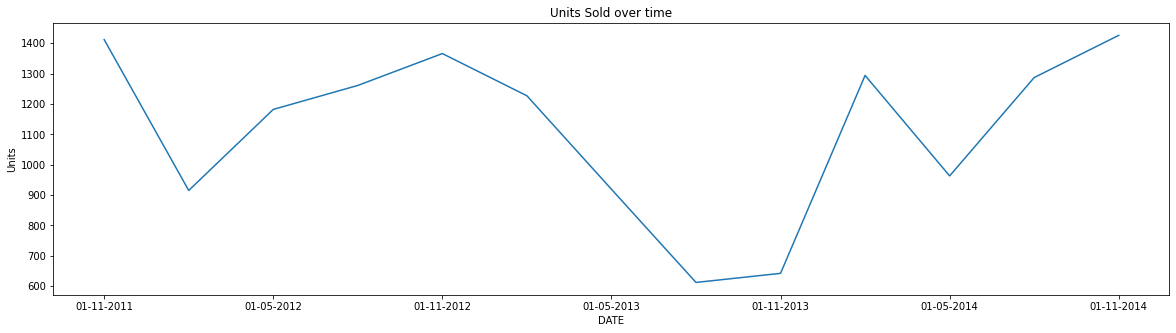

In [68]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.title('Units Sold over time')
plt.ylabel('Units')
sku1.Units_Sold.plot() ;